# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                          
{'name': 'main', 'type': 'function'}       29215950      1  regionprofile   
                                           146012865     1  regionprofile   
                                           147820356     1  regionprofile   
                                           265841932     1  regionprofile   
                                           272946715     1  regionprofile   
                                           287146090     1  regionprofile   
                                           370820379     1  regionprofile   
                                           493235734     1  regionprofile   
                                           572207339     1  regionprofile   
                                           591596670     1  regionprofile   
                                           967792516     1  regionprofile   
                                           1153964906    1  regionprofile   
                                           1171731854    1  regionprofile   
                                           1315583628    1  regionprofile   
                                           1955189954    1  regionprofile   
                                           1959237042    1  regionprofile   
                                           2042145668    1  regionprofile   
                                           2083166345    1  regionprofile   
                                           2162176630    1  regionprofile   
                                           2245754787    1  regionprofile   
                                           2469257219    1  regionprofile   
                                           2693071802    1  regionprofile   
                                           3242239847    1  regionprofile   
                                           3287043515    1  regionprofile   
                                           3368116843    1  regionprofile   
                                           3872955559    1  regionprofile   
                                           3889823882    1  regionprofile   
                                           4171814533    1  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 29215950      8  regionprofile   
                                           146012865     8  regionprofile   
                                           147820356     8  regionprofile   
                                           265841932     8  regionprofile   
                                           272946715     8  regionprofile   
                                           287146090     8  regionprofile   
                                           370820379     8  regionprofile   
                                           493235734     8  regionprofile   
                                           572207339     8  regionprofile   
                                           591596670     8  regionprofile   
                                           967792516     8  regionprofile   
                                           1153964906    8  regionprofile   
                                           1171731854    8  regionprofile   
                                           1315583628    8  regionprofile   
                                           1955189954    8  regionprofile   
                                           1959237042    8  regionprofile   
                                           2042145668    8  regionprofile   
                                           2083166345    8  regionprofile   
                                           2162176630    8  regionprofile   
                                           2245754787    8  regionprofile   
                                           2469257219    8  regionprofile   
                                           2693071802    8  regionprofile   
                                           32422398

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
29215950,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a262144.cali,true,1701307271,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 262144, Random]",c,Radix,MPI,int,4,262144,Random,2,0,0,4,AI
146012865,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a262144.cali,true,1701307272,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 262144, Random]",c,Radix,MPI,int,4,262144,Random,64,0,0,4,AI
147820356,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a65536.cali,true,1701307259,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,64,0,0,4,AI
265841932,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a4194304.cali,true,1701307293,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 4194304, Random]",c,Radix,MPI,int,4,4194304,Random,16,0,0,4,AI
272946715,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536.cali,true,1701307247,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,2,0,0,4,AI
287146090,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a65536.cali,true,1701307270,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,32,0,0,4,AI
370820379,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p1-a1048576.cali,true,1701307271,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, Random]",c,Radix,MPI,int,4,1048576,Random,1,0,0,4,AI
493235734,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a1048576.cali,true,1701307290,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, Random]",c,Radix,MPI,int,4,1048576,Random,16,0,0,4,AI
572207339,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a262144.cali,true,1701307271,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 262144, Random]",c,Radix,MPI,int,4,262144,Random,8,0,0,4,AI


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b MPI_Recv_1\x1b\n├─ \x1b1.000\x1b MPI_Send_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n│     └─ \x1b1.000\x1b comp_small\x1b\n│        └─ \x1b1.000\x1b seq_sort\x1b\n├─ \x1b1.000\x1b data_init\x1b\n└─ \x1b1.000\x1b seq_sort\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 MPI_Recv_1
├─ 1.000 MPI_Send_1
├─ 1.000 comp
│  └─ 1.000 comp_large
│     └─ 1.000 comp_small
│        └─ 1.000 seq_sort
├─ 1.000 data_init
└─ 1.000 seq_sort

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b09d879b1c0>, 262144: <thicket.thicket.Thicket object at 0x2b09d87c1d60>, 1048576: <thicket.thicket.Thicket object at 0x2b09d8817040>, 4194304: <thicket.thicket.Thicket object at 0x2b09d88018e0>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2b09d879b1c0>, 262144: <thicket.thicket.Thicket object at 0x2b09d87c1d60>, 1048576: <thicket.thicket.Thicket object at 0x2b09d8817040>, 4194304: <thicket.thicket.Thicket object at 0x2b09d88018e0>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2b09d879b1c0>, <thicket.thicket.Thicket object at 0x2b09d87c1d60>, <thicket.thicket.Thicket object at 0x2b09d8817040>, <thicket.thicket.Thicket object at 0x2b09d88018e0>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [11]:
ctk.dataframe

65536                 \
                                                       nid   spot.channel   
node                                       num_procs                        
{'name': 'main', 'type': 'function'}       1             1  regionprofile   
                                           2             1  regionprofile   
                                           4             1  regionprofile   
                                           8             1  regionprofile   
                                           16            1  regionprofile   
                                           32            1  regionprofile   
                                           64            1  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 1             8  regionprofile   
                                           2             8  regionprofile   
                                           4             8  regionprofile   
                                           8             8  regionprofile   
                                           16            8  regionprofile   
                                           32            8  regionprofile   
                                           64            8  regionprofile   
{'name': 'MPI_Send_1', 'type': 'function'} 1             3  regionprofile   
                                           2             3  regionprofile   
                                           4             3  regionprofile   
                                           8             3  regionprofile   
                                           16            3  regionprofile   
                                           32            3  regionprofile   
                                           64            3  regionprofile   
{'name': 'comp', 'type': 'function'}       1             4  regionprofile   
                                           2             4  regionprofile   
                                           4             4  regionprofile   
                                           8             4  regionprofile   
                                           16            4  regionprofile   
                                           32            4  regionprofile   
                                           64            4  regionprofile   
{'name': 'comp_large', 'type': 'function'} 1             5  regionprofile   
                                           2             5  regionprofile   
                                           4             5  regionprofile   
                                           8             5  regionprofile   
                                           16            5  regionprofile   
                                           32            5  regionprofile   
                                           64            5  regionprofile   
{'name': 'comp_small', 'type': 'function'} 1             6  regionprofile   
                                           2             6  regionprofile   
                                           4             6  regionprofile   
                                           8             6  regionprofile   
                                           16            6  regionprofile   
                                           32            6  regionprofile   
                                           64            6  regionprofile   
{'name': 'seq_sort', 'type': 'function'}   1             7  regionprofile   
                                           2             7  regionprofile   
                                           4             7  regionprofile   
                                           8             7  regionprofile   
                                           16            7  regionprofile   
                                           32            7  regionprofile   
                                           64            7  regionprofile   
{'name': 'data_init', 'type': 'function'}  1     

Perform pandas operations to get the table in a desirable format for plotting

In [12]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [13]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [14]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [16]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [17]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Variance time/rank"), (262144, "Variance time/rank"), (1048576, "Variance time/rank"), (4194304, "Variance time/rank")], axis=1)

In [18]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [19]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [20]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [21]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [22]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              2.296298      0.592155      0.536341      1.352288
           2              0.503086      0.565455      0.658573      1.105506
           4              0.699217      0.391445      0.449871      0.711533
           8              0.917946      0.498864      0.548685      0.721525
           16             0.763294      0.754279      0.811242      0.921811
           32             1.328021      1.399333      1.373291      1.481080
           64             2.635733      2.725171      2.675484      2.904877
MPI_Recv_1 1              0.001170      0.001118      0.000734      0.002367
           2              0.000179      0.000293      0.000941      0.002617
           4              0.000124      0.000083      0.000398      0.003616
           8              0.000045      0.000062      0.000211      0.002342
           16             0.000047      0.000130      0.000168      0.001082
           32             0.000927      0.000075      0.000131      0.000448
           64             0.000904      0.000089      0.000072      0.000423
MPI_Send_1 1              0.001367      0.002007      0.001789      0.005209
           2              0.000147      0.000497      0.001942      0.005522
           4              0.000974      0.000407      0.001548      0.005381
           8              0.001059      0.000333      0.001930      0.004883
           16             0.000098      0.000425      0.001343      0.003292
           32             0.001181      0.000831      0.001102      0.004421
           64             0.001617      0.001090      0.000255      0.001292
comp       1              0.008928      0.031226      0.118557      0.474977
           2              0.003780      0.015003      0.059759      0.238009
           4              0.001657      0.007641      0.029943      0.119411
           8              0.001376      0.003817      0.014982      0.059801
           16             0.000541      0.002130      0.007511      0.029938
           32             0.000291      0.000935      0.003802      0.015009
           64             0.000186      0.000497      0.002861      0.010222
comp_large 1              0.008911      0.031207      0.118538      0.474956
           2              0.003765      0.014985      0.059738      0.237989
           4              0.001642      0.007627      0.029927      0.119393
           8              0.001358      0.003804      0.014966      0.059785
           16             0.000528      0.002116      0.007497      0.029923
           32             0.000277      0.000922      0.003789      0.014995
           64             0.000172      0.000482      0.002848      0.010207
comp_small 1              0.008659      0.030392      0.115559      0.463112
           2              0.003649      0.014591      0.058227      0.232065
           4              0.001575      0.007413      0.029164      0.116395
           8              0.001293      0.003685      0.014570      0.058274
           16             0.000493      0.002034      0.007289      0.029161
           32             0.000251      0.000877      0.003669      0.014601
           64             0.000149      0.000449      0.002779      0.009857
seq_sort   1              0.001046      0.003625      0.013736      0.055154
           2              0.000453      0.001755      0.006908      0.027489
           4              0.000204      0.000894      0.003469      0.013781
           8              0.000171      0.000455      0.001747      0.006909
           16             0.000073      0.000259      0.000885      0.003473
           32             0.000044      0.000118      0.000452      0.001748
           64             0.000030      0.000066      0.000580      0.001117
data_init  1             

In [23]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [24]:
df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

/tmp/job.9363977/ipykernel_264109/1976952143.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_1 = ctk.dataframe.loc['main',(65536)] # both column and row


,Avg time/rank
num_procs,
1,2.296298
2,0.503086
4,0.699217
8,0.917946
16,0.763294
32,1.328021
64,2.635733


In [25]:
# import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

In [26]:
# # for matrix in matrix_sizes:
    
# for name in function_names:
#     plot_pandas(
#         df=ctk.dataframe.loc[name],
#         title=name,
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         loglog=True,
#         figsize=(20, 20)
#     )
#     plt.show()

In [27]:
# ctk.dataframe

## SPEEDUP


In [31]:
df_1 = ctk.dataframe.loc[['main', "data_init", "MPI_Recv_1", "MPI_Send_1", "comp", "comp_large", "comp_small"]] # all rows 1 column
# df_1 = ctk.dataframe
ctk.dataframe = df_1
ctk.dataframe


65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              2.296298      0.592155      0.536341      1.352288
           2              0.503086      0.565455      0.658573      1.105506
           4              0.699217      0.391445      0.449871      0.711533
           8              0.917946      0.498864      0.548685      0.721525
           16             0.763294      0.754279      0.811242      0.921811
           32             1.328021      1.399333      1.373291      1.481080
           64             2.635733      2.725171      2.675484      2.904877
data_init  1              2.267983      0.519758      0.281443      0.350383
           2              0.489568      0.528054      0.525772      0.595302
           4              0.689127      0.369874      0.380129      0.448210
           8              0.908999      0.485299      0.510105      0.584257
           16             0.756802      0.744280      0.788795      0.849751
           32             1.320092      1.391189      1.358879      1.439652
           64             2.624228      2.711223      2.658603      2.866963
MPI_Recv_1 1              0.001170      0.001118      0.000734      0.002367
           2              0.000179      0.000293      0.000941      0.002617
           4              0.000124      0.000083      0.000398      0.003616
           8              0.000045      0.000062      0.000211      0.002342
           16             0.000047      0.000130      0.000168      0.001082
           32             0.000927      0.000075      0.000131      0.000448
           64             0.000904      0.000089      0.000072      0.000423
MPI_Send_1 1              0.001367      0.002007      0.001789      0.005209
           2              0.000147      0.000497      0.001942      0.005522
           4              0.000974      0.000407      0.001548      0.005381
           8              0.001059      0.000333      0.001930      0.004883
           16             0.000098      0.000425      0.001343      0.003292
           32             0.001181      0.000831      0.001102      0.004421
           64             0.001617      0.001090      0.000255      0.001292
comp       1              0.008928      0.031226      0.118557      0.474977
           2              0.003780      0.015003      0.059759      0.238009
           4              0.001657      0.007641      0.029943      0.119411
           8              0.001376      0.003817      0.014982      0.059801
           16             0.000541      0.002130      0.007511      0.029938
           32             0.000291      0.000935      0.003802      0.015009
           64             0.000186      0.000497      0.002861      0.010222
comp_large 1              0.008911      0.031207      0.118538      0.474956
           2              0.003765      0.014985      0.059738      0.237989
           4              0.001642      0.007627      0.029927      0.119393
           8              0.001358      0.003804      0.014966      0.059785
           16             0.000528      0.002116      0.007497      0.029923
           32             0.000277      0.000922      0.003789      0.014995
           64             0.000172      0.000482      0.002848      0.010207
comp_small 1              0.008659      0.030392      0.115559      0.463112
           2              0.003649      0.014591      0.058227      0.232065
           4              0.001575      0.007413      0.029164      0.116395
           8              0.001293      0.003685      0.014570      0.058274
           16             0.000493      0.002034      0.007289      0.029161
           32             0.000251      0.000877      0.003669      0.014601
           64             0.000149      0.000449      0.002779      0.009857

In [32]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [33]:
speedup_df

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              1.000000      1.000000      1.000000      1.000000
           2              4.564424      1.047219      0.814399      1.223230
           4              3.284099      1.512741      1.192211      1.900527
           8              2.501561      1.187007      0.977503      1.874208
           16             3.008406      0.785061      0.661136      1.466991
           32             1.729113      0.423169      0.390552      0.913042
           64             0.871218      0.217291      0.200465      0.465523
data_init  1              1.000000      1.000000      1.000000      1.000000
           2              4.632621      0.984289      0.535295      0.588580
           4              3.291096      1.405230      0.740388      0.781738
           8              2.495034      1.071006      0.551735      0.599707
           16             2.996798      0.698337      0.356801      0.412336
           32             1.718049      0.373607      0.207114      0.243380
           64             0.864248      0.191706      0.105861      0.122214
MPI_Recv_1 1              1.000000      1.000000      1.000000      1.000000
           2              6.536313      3.815700      0.780021      0.904471
           4              9.435484     13.469880      1.844221      0.654591
           8             26.000000     18.032258      3.478673      1.010675
           16            24.893617      8.600000      4.369048      2.187616
           32             1.262136     14.906667      5.603053      5.283482
           64             1.294248     12.561798     10.194444      5.595745
MPI_Send_1 1              1.000000      1.000000      1.000000      1.000000
           2              9.299320      4.038229      0.921215      0.943318
           4              1.403491      4.931204      1.155685      0.968036
           8              1.290840      6.027027      0.926943      1.066762
           16            13.948980      4.722353      1.332092      1.582321
           32             1.157494      2.415162      1.623412      1.178240
           64             0.845393      1.841284      7.015686      4.031734
comp       1              1.000000      1.000000      1.000000      1.000000
           2              2.361905      2.081317      1.983919      1.995626
           4              5.388051      4.086638      3.959423      3.977665
           8              6.488372      8.180770      7.913296      7.942626
           16            16.502773     14.660094     15.784449     15.865355
           32            30.680412     33.396791     31.182799     31.646146
           64            48.000000     62.828974     41.439007     46.466151
comp_large 1              1.000000      1.000000      1.000000      1.000000
           2              2.366799      2.082549      1.984298      1.995706
           4              5.426918      4.091648      3.960905      3.978089
           8              6.561856      8.203733      7.920486      7.944401
           16            16.876894     14.748110     15.811391     15.872606
           32            32.169675     33.847072     31.284772     31.674291
           64            51.808140     64.744813     41.621489     46.532380
comp_small 1              1.000000      1.000000      1.000000      1.000000
           2              2.372979      2.082928      1.984629      1.995613
           4              5.497778      4.099825      3.962385      3.978796
           8              6.696829      8.247490      7.931297      7.947146
           16            17.563895     14.941986     15.853889     15.881211
           32            34.498008     34.654504     31.496048     31.717828
           64            58.114094     67.688196     41.582944     46.983058

<Figure size 1440x1440 with 0 Axes>

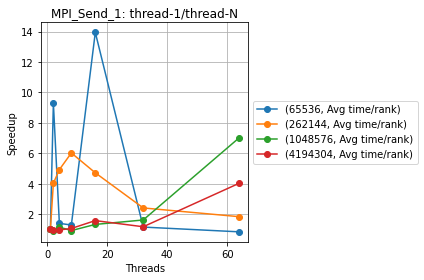

<Figure size 1440x1440 with 0 Axes>

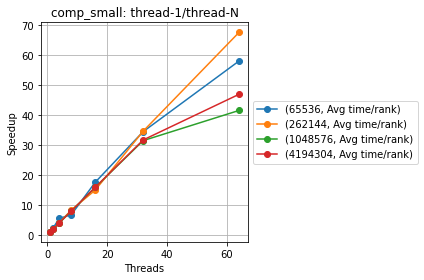

<Figure size 1440x1440 with 0 Axes>

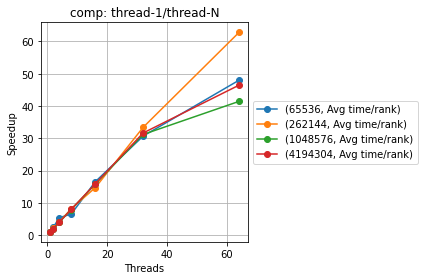

<Figure size 1440x1440 with 0 Axes>

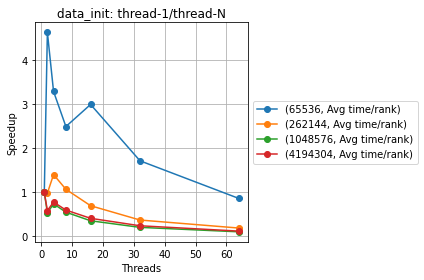

<Figure size 1440x1440 with 0 Axes>

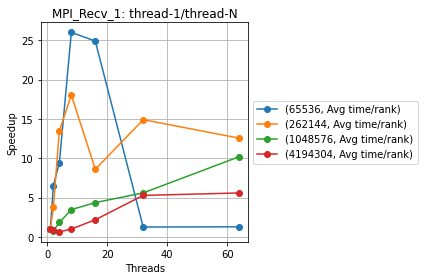

<Figure size 1440x1440 with 0 Axes>

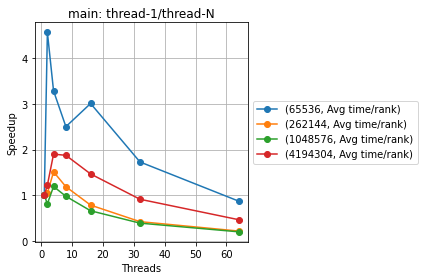

<Figure size 1440x1440 with 0 Axes>

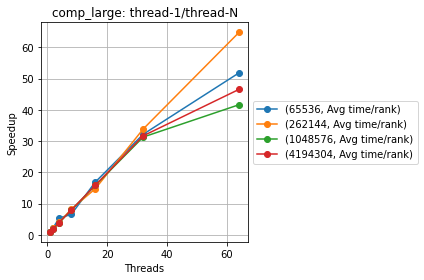

In [35]:
function_names = set(['main', "data_init", "MPI_Recv_1", "MPI_Send_1", "comp", "comp_large", "comp_small"])
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## Weak Scaling ---------------------------------------------------------------------------------------

In [36]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("Random/*.cali"))

In [37]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                          
{'name': 'main', 'type': 'function'}       111940726     1  regionprofile   
                                           252630244     1  regionprofile   
                                           255071896     1  regionprofile   
                                           595137498     1  regionprofile   
                                           610551395     1  regionprofile   
                                           788434160     1  regionprofile   
                                           1028009031    1  regionprofile   
                                           1344214232    1  regionprofile   
                                           1367267599    1  regionprofile   
                                           1387971100    1  regionprofile   
                                           2051493650    1  regionprofile   
                                           2760773100    1  regionprofile   
                                           2893644833    1  regionprofile   
                                           2979694443    1  regionprofile   
                                           2995570126    1  regionprofile   
                                           3004377536    1  regionprofile   
                                           3011752296    1  regionprofile   
                                           3367116090    1  regionprofile   
                                           3395650395    1  regionprofile   
                                           3519044429    1  regionprofile   
                                           3797586406    1  regionprofile   
                                           3830257495    1  regionprofile   
                                           3977902056    1  regionprofile   
                                           4038449481    1  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 111940726     8  regionprofile   
                                           252630244     8  regionprofile   
                                           255071896     8  regionprofile   
                                           595137498     8  regionprofile   
                                           610551395     8  regionprofile   
                                           788434160     8  regionprofile   
                                           1028009031    8  regionprofile   
                                           1344214232    8  regionprofile   
                                           1367267599    8  regionprofile   
                                           1387971100    8  regionprofile   
                                           2051493650    8  regionprofile   
                                           2760773100    8  regionprofile   
                                           2893644833    8  regionprofile   
                                           2979694443    8  regionprofile   
                                           2995570126    8  regionprofile   
                                           3004377536    8  regionprofile   
                                           3011752296    8  regionprofile   
                                           3367116090    8  regionprofile   
                                           3395650395    8  regionprofile   
                                           3519044429    8  regionprofile   
                                           3797586406    8  regionprofile   
                                           3830257495    8  regionprofile   
                                           3977902056    8  regionprofile   
                                           4038449481    8  regionprofile   
{'name': 'MPI_Send_1', 'type': 'function'} 111940726     3  regionprofile   
                                           252630244     3  regionprofile   
                                           25507189

In [38]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
111940726,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a4194304.cali,true,1701307290,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 4194304, Random]",c,Radix,MPI,int,4,4194304,Random,2,0,0,4,AI
252630244,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a65536.cali,true,1701307252,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,8,0,0,4,AI
255071896,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a4194304.cali,true,1701307291,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 4194304, Random]",c,Radix,MPI,int,4,4194304,Random,8,0,0,4,AI
595137498,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576.cali,true,1701307290,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, Random]",c,Radix,MPI,int,4,1048576,Random,4,0,0,4,AI
610551395,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a1048576.cali,true,1701307290,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, Random]",c,Radix,MPI,int,4,1048576,Random,64,0,0,4,AI
788434160,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a4194304.cali,true,1701307308,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 4194304, Random]",c,Radix,MPI,int,4,4194304,Random,64,0,0,4,AI
1028009031,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a4194304.cali,true,1701307290,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 4194304, Random]",c,Radix,MPI,int,4,4194304,Random,4,0,0,4,AI
1344214232,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a262144.cali,true,1701307272,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 262144, Random]",c,Radix,MPI,int,4,262144,Random,32,0,0,4,AI
1367267599,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536.cali,true,1701307247,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,2,0,0,4,AI


In [39]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b MPI_Recv_1\x1b\n├─ \x1b1.000\x1b MPI_Send_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n│     └─ \x1b1.000\x1b comp_small\x1b\n│        └─ \x1b1.000\x1b seq_sort\x1b\n├─ \x1b1.000\x1b data_init\x1b\n└─ \x1b1.000\x1b seq_sort\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [40]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b09db99e8e0>, 262144: <thicket.thicket.Thicket object at 0x2b09dba35ee0>, 1048576: <thicket.thicket.Thicket object at 0x2b09db9d80d0>, 4194304: <thicket.thicket.Thicket object at 0x2b09db3e7f70>}


In [41]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [42]:
ctk.dataframe

65536                 \
                                                       nid   spot.channel   
node                                       num_procs                        
{'name': 'main', 'type': 'function'}       2             1  regionprofile   
                                           4             1  regionprofile   
                                           8             1  regionprofile   
                                           16            1  regionprofile   
                                           32            1  regionprofile   
                                           64            1  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 2             8  regionprofile   
                                           4             8  regionprofile   
                                           8             8  regionprofile   
                                           16            8  regionprofile   
                                           32            8  regionprofile   
                                           64            8  regionprofile   
{'name': 'MPI_Send_1', 'type': 'function'} 2             3  regionprofile   
                                           4             3  regionprofile   
                                           8             3  regionprofile   
                                           16            3  regionprofile   
                                           32            3  regionprofile   
                                           64            3  regionprofile   
{'name': 'comp', 'type': 'function'}       2             4  regionprofile   
                                           4             4  regionprofile   
                                           8             4  regionprofile   
                                           16            4  regionprofile   
                                           32            4  regionprofile   
                                           64            4  regionprofile   
{'name': 'comp_large', 'type': 'function'} 2             5  regionprofile   
                                           4             5  regionprofile   
                                           8             5  regionprofile   
                                           16            5  regionprofile   
                                           32            5  regionprofile   
                                           64            5  regionprofile   
{'name': 'comp_small', 'type': 'function'} 2             6  regionprofile   
                                           4             6  regionprofile   
                                           8             6  regionprofile   
                                           16            6  regionprofile   
                                           32            6  regionprofile   
                                           64            6  regionprofile   
{'name': 'seq_sort', 'type': 'function'}   2             7  regionprofile   
                                           4             7  regionprofile   
                                           8             7  regionprofile   
                                           16            7  regionprofile   
                                           32            7  regionprofile   
                                           64            7  regionprofile   
{'name': 'data_init', 'type': 'function'}  2             2  regionprofile   
                                           4             2  regionprofile   
                                           8             2  regionprofile   
                                           16            2  regionprofile   
                                           32            2  regionprofile   
                                           64            2  regionprofile   
{'name': 'seq_sort', 'type': 'function'}   2             9  regionprofile   
                                           4     

In [43]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [44]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [45]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [46]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [47]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Variance time/rank"), (262144, "Variance time/rank"), (1048576, "Variance time/rank"), (4194304, "Variance time/rank")], axis=1)

In [48]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [49]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [50]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [51]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [52]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       2              0.503086      0.565455      0.658573      1.105506
           4              0.699217      0.391445      0.449871      0.711533
           8              0.917946      0.498864      0.548685      0.721525
           16             0.763294      0.754279      0.811242      0.921811
           32             1.328021      1.399333      1.373291      1.481080
           64             2.635733      2.725171      2.675484      2.904877
MPI_Recv_1 2              0.000179      0.000293      0.000941      0.002617
           4              0.000124      0.000083      0.000398      0.003616
           8              0.000045      0.000062      0.000211      0.002342
           16             0.000047      0.000130      0.000168      0.001082
           32             0.000927      0.000075      0.000131      0.000448
           64             0.000904      0.000089      0.000072      0.000423
MPI_Send_1 2              0.000147      0.000497      0.001942      0.005522
           4              0.000974      0.000407      0.001548      0.005381
           8              0.001059      0.000333      0.001930      0.004883
           16             0.000098      0.000425      0.001343      0.003292
           32             0.001181      0.000831      0.001102      0.004421
           64             0.001617      0.001090      0.000255      0.001292
comp       2              0.003780      0.015003      0.059759      0.238009
           4              0.001657      0.007641      0.029943      0.119411
           8              0.001376      0.003817      0.014982      0.059801
           16             0.000541      0.002130      0.007511      0.029938
           32             0.000291      0.000935      0.003802      0.015009
           64             0.000186      0.000497      0.002861      0.010222
comp_large 2              0.003765      0.014985      0.059738      0.237989
           4              0.001642      0.007627      0.029927      0.119393
           8              0.001358      0.003804      0.014966      0.059785
           16             0.000528      0.002116      0.007497      0.029923
           32             0.000277      0.000922      0.003789      0.014995
           64             0.000172      0.000482      0.002848      0.010207
comp_small 2              0.003649      0.014591      0.058227      0.232065
           4              0.001575      0.007413      0.029164      0.116395
           8              0.001293      0.003685      0.014570      0.058274
           16             0.000493      0.002034      0.007289      0.029161
           32             0.000251      0.000877      0.003669      0.014601
           64             0.000149      0.000449      0.002779      0.009857
seq_sort   2              0.000453      0.001755      0.006908      0.027489
           4              0.000204      0.000894      0.003469      0.013781
           8              0.000171      0.000455      0.001747      0.006909
           16             0.000073      0.000259      0.000885      0.003473
           32             0.000044      0.000118      0.000452      0.001748
           64             0.000030      0.000066      0.000580      0.001117
data_init  2              0.489568      0.528054      0.525772      0.595302
           4              0.689127      0.369874      0.380129      0.448210
           8              0.908999      0.485299      0.510105      0.584257
           16             0.756802      0.744280      0.788795      0.849751
           32             1.320092      1.391189      1.358879      1.439652
           64             2.624228      2.711223      2.658603      2.866963
seq_sort   2              0.000886      0.003464      0.013746      0.054993
           4             

In [53]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [54]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc['main','comm','comm_large','cudaMemcpy_1','comp','comp_large','data_init'] # all rows 1 column


# df_1 = ctk.dataframe.loc[:] # all rows 1 column

# df_1

df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
# df_1
# df_1 = ctk.dataframe.reset_index().drop([("name", "")], axis=1)
# df_1
# df_1 = df_1.loc[]

df_2 = df_1.loc[[64,128,256,512]]
df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

KeyError: '[128, 256, 512] not in index'

In [55]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

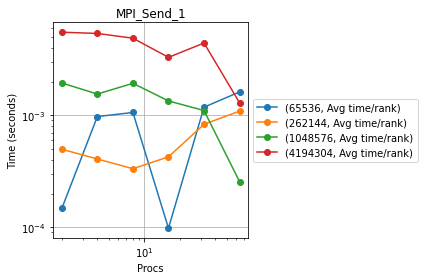

<Figure size 1440x1440 with 0 Axes>

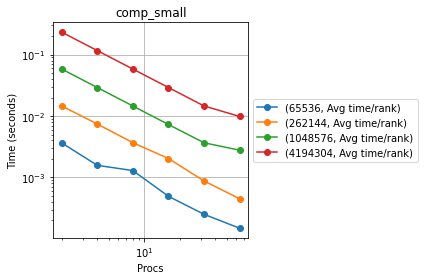

<Figure size 1440x1440 with 0 Axes>

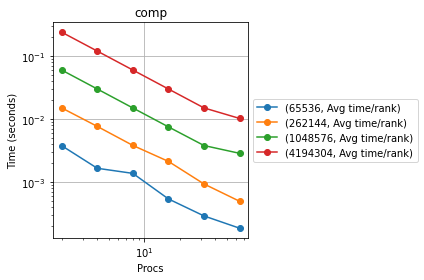

<Figure size 1440x1440 with 0 Axes>

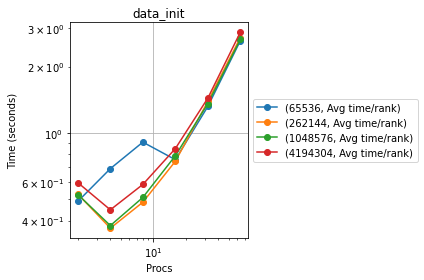

<Figure size 1440x1440 with 0 Axes>

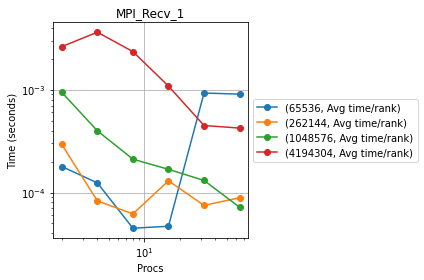

<Figure size 1440x1440 with 0 Axes>

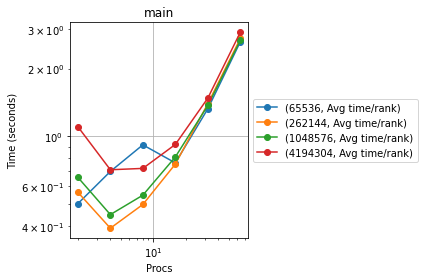

<Figure size 1440x1440 with 0 Axes>

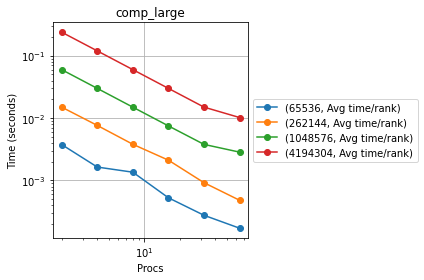

In [57]:
# for matrix in matrix_sizes:
function_names = set(['main', "data_init", "MPI_Recv_1", "MPI_Send_1", "comp", "comp_large", "comp_small"])
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Procs",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [58]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       2              0.503086      0.565455      0.658573      1.105506
           4              0.699217      0.391445      0.449871      0.711533
           8              0.917946      0.498864      0.548685      0.721525
           16             0.763294      0.754279      0.811242      0.921811
           32             1.328021      1.399333      1.373291      1.481080
           64             2.635733      2.725171      2.675484      2.904877
MPI_Recv_1 2              0.000179      0.000293      0.000941      0.002617
           4              0.000124      0.000083      0.000398      0.003616
           8              0.000045      0.000062      0.000211      0.002342
           16             0.000047      0.000130      0.000168      0.001082
           32             0.000927      0.000075      0.000131      0.000448
           64             0.000904      0.000089      0.000072      0.000423
MPI_Send_1 2              0.000147      0.000497      0.001942      0.005522
           4              0.000974      0.000407      0.001548      0.005381
           8              0.001059      0.000333      0.001930      0.004883
           16             0.000098      0.000425      0.001343      0.003292
           32             0.001181      0.000831      0.001102      0.004421
           64             0.001617      0.001090      0.000255      0.001292
comp       2              0.003780      0.015003      0.059759      0.238009
           4              0.001657      0.007641      0.029943      0.119411
           8              0.001376      0.003817      0.014982      0.059801
           16             0.000541      0.002130      0.007511      0.029938
           32             0.000291      0.000935      0.003802      0.015009
           64             0.000186      0.000497      0.002861      0.010222
comp_large 2              0.003765      0.014985      0.059738      0.237989
           4              0.001642      0.007627      0.029927      0.119393
           8              0.001358      0.003804      0.014966      0.059785
           16             0.000528      0.002116      0.007497      0.029923
           32             0.000277      0.000922      0.003789      0.014995
           64             0.000172      0.000482      0.002848      0.010207
comp_small 2              0.003649      0.014591      0.058227      0.232065
           4              0.001575      0.007413      0.029164      0.116395
           8              0.001293      0.003685      0.014570      0.058274
           16             0.000493      0.002034      0.007289      0.029161
           32             0.000251      0.000877      0.003669      0.014601
           64             0.000149      0.000449      0.002779      0.009857
seq_sort   2              0.000453      0.001755      0.006908      0.027489
           4              0.000204      0.000894      0.003469      0.013781
           8              0.000171      0.000455      0.001747      0.006909
           16             0.000073      0.000259      0.000885      0.003473
           32             0.000044      0.000118      0.000452      0.001748
           64             0.000030      0.000066      0.000580      0.001117
data_init  2              0.489568      0.528054      0.525772      0.595302
           4              0.689127      0.369874      0.380129      0.448210
           8              0.908999      0.485299      0.510105      0.584257
           16             0.756802      0.744280      0.788795      0.849751
           32             1.320092      1.391189      1.358879      1.439652
           64             2.624228      2.711223      2.658603      2.866963
seq_sort   2              0.000886      0.003464      0.013746      0.054993
           4             

## STRONG SCALING ------------------------------------------------------------------------------------


In [59]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("all_a65536/*.cali"))

In [60]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                          
{'name': 'main', 'type': 'function'}       637079146     1  regionprofile   
                                           1304649898    1  regionprofile   
                                           1327909995    1  regionprofile   
                                           1390372929    1  regionprofile   
                                           1667786985    1  regionprofile   
                                           1700332102    1  regionprofile   
                                           2062328259    1  regionprofile   
                                           2092762287    1  regionprofile   
                                           2213548684    1  regionprofile   
                                           2506976496    1  regionprofile   
                                           2697998764    1  regionprofile   
                                           2741960286    1  regionprofile   
                                           2931224810    1  regionprofile   
                                           3158866933    1  regionprofile   
                                           3273087740    1  regionprofile   
                                           3333898152    1  regionprofile   
                                           3372149063    1  regionprofile   
                                           3428098586    1  regionprofile   
                                           3591884083    1  regionprofile   
                                           3811524764    1  regionprofile   
                                           3914537702    1  regionprofile   
                                           4101831537    1  regionprofile   
                                           4144378152    1  regionprofile   
                                           4180194541    1  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 637079146     8  regionprofile   
                                           1304649898    8  regionprofile   
                                           1327909995    8  regionprofile   
                                           1390372929    8  regionprofile   
                                           1667786985    8  regionprofile   
                                           1700332102    8  regionprofile   
                                           2062328259    8  regionprofile   
                                           2092762287    8  regionprofile   
                                           2213548684    8  regionprofile   
                                           2506976496    8  regionprofile   
                                           2697998764    8  regionprofile   
                                           2741960286    8  regionprofile   
                                           2931224810    8  regionprofile   
                                           3158866933    8  regionprofile   
                                           3273087740    8  regionprofile   
                                           3333898152    8  regionprofile   
                                           3372149063    8  regionprofile   
                                           3428098586    8  regionprofile   
                                           3591884083    8  regionprofile   
                                           3811524764    8  regionprofile   
                                           3914537702    8  regionprofile   
                                           4101831537    8  regionprofile   
                                           4144378152    8  regionprofile   
                                           4180194541    8  regionprofile   
{'name': 'MPI_Send_1', 'type': 'function'} 637079146     3  regionprofile   
                                           1304649898    3  regionprofile   
                                           13279099

In [61]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
637079146,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a65536.cali,true,1701308009,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, 1%perturbed, 65536-nums-pert....",c,Radix,MPI,int,4,65536,1%perturbed,16,0,0,4,AI
1304649898,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a65536.cali,true,1701307850,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, reversedSort, 65536-nums-rev....",c,Radix,MPI,int,4,65536,reversedSort,64,0,0,4,AI
1327909995,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a65536.cali,true,1701307261,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,16,0,0,4,AI
1390372929,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a65536.cali,true,1701307252,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,4,0,0,4,AI
1667786985,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a65536.cali,true,1701307259,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Random]",c,Radix,MPI,int,4,65536,Random,64,0,0,4,AI
1700332102,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a65536.cali,true,1701308009,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, 1%perturbed, 65536-nums-pert....",c,Radix,MPI,int,4,65536,1%perturbed,8,0,0,4,AI
2062328259,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536.cali,true,1701307850,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, reversedSort, 65536-nums-rev....",c,Radix,MPI,int,4,65536,reversedSort,2,0,0,4,AI
2092762287,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a65536.cali,true,1701308229,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Sorted, 65536-nums-sorted.txt]",c,Radix,MPI,int,4,65536,Sorted,8,0,0,4,AI
2213548684,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a65536.cali,true,1701308251,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, Sorted, 65536-nums-sorted.txt]",c,Radix,MPI,int,4,65536,Sorted,64,0,0,4,AI


In [62]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b MPI_Recv_1\x1b\n├─ \x1b1.000\x1b MPI_Send_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n│     └─ \x1b1.000\x1b comp_small\x1b\n│        └─ \x1b1.000\x1b seq_sort\x1b\n├─ \x1b1.000\x1b data_init\x1b\n└─ \x1b1.000\x1b seq_sort\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [63]:
gb = tk.groupby("InputType")

4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x2b09d87a04c0>, 'Random': <thicket.thicket.Thicket object at 0x2b09d8895100>, 'Sorted': <thicket.thicket.Thicket object at 0x2b09d887c130>, 'reversedSort': <thicket.thicket.Thicket object at 0x2b09d8793c10>}


In [64]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [65]:
ctk.dataframe

1%perturbed  \
                                                             nid   
node                                       num_procs               
{'name': 'main', 'type': 'function'}       2                   1   
                                           4                   1   
                                           8                   1   
                                           16                  1   
                                           32                  1   
                                           64                  1   
{'name': 'MPI_Recv_1', 'type': 'function'} 2                   8   
                                           4                   8   
                                           8                   8   
                                           16                  8   
                                           32                  8   
                                           64                  8   
{'name': 'MPI_Send_1', 'type': 'function'} 2                   3   
                                           4                   3   
                                           8                   3   
                                           16                  3   
                                           32                  3   
                                           64                  3   
{'name': 'comp', 'type': 'function'}       2                   4   
                                           4                   4   
                                           8                   4   
                                           16                  4   
                                           32                  4   
                                           64                  4   
{'name': 'comp_large', 'type': 'function'} 2                   5   
                                           4                   5   
                                           8                   5   
                                           16                  5   
                                           32                  5   
                                           64                  5   
{'name': 'comp_small', 'type': 'function'} 2                   6   
                                           4                   6   
                                           8                   6   
                                           16                  6   
                                           32                  6   
                                           64                  6   
{'name': 'seq_sort', 'type': 'function'}   2                   7   
                                           4                   7   
                                           8                   7   
                                           16                  7   
                                           32                  7   
                                           64                  7   
{'name': 'data_init', 'type': 'function'}  2                   2   
                                           4                   2   
                                           8                   2   
                                           16                  2   
                                           32                  2   
                                           64                  2   
{'name': 'seq_sort', 'type': 'function'}   2                   9   
                                           4                   9   
                                           8                   9   
                                           16                  9   
                                           32                  9   
                                           64                  9   

                                                                     \
                                                       spot.channel   
node                              

In [67]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1%perturbed", "spot.channel"), ("Random", "spot.channel"), ("reversedSort", "spot.channel"), ("Sorted", "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("1%perturbed", "nid"), ("Random", "nid"), ("reversedSort", "nid"), ("Sorted", "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [68]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [70]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1%perturbed", "Min time/rank"), ("Random", "Min time/rank"), ("reversedSort", "Min time/rank"), ("Sorted", "Min time/rank")], axis=1)

In [71]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1%perturbed", "Max time/rank"), ("Random", "Max time/rank"), ("reversedSort", "Max time/rank"), ("Sorted", "Max time/rank")], axis=1)

In [72]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1%perturbed", "Variance time/rank"), ("Random", "Variance time/rank"), ("reversedSort", "Variance time/rank"), ("Sorted", "Variance time/rank")], axis=1)

In [73]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [74]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [75]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1%perturbed", "Total time"), ("Random", "Total time"), ("reversedSort", "Total time"), ("Sorted", "Total time")], axis=1)

In [76]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [77]:
ctk.dataframe

1%perturbed        Random        Sorted  reversedSort
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       2              0.519204      0.503086      0.501180      0.506963
           4              0.375914      0.699217      0.371599      0.377838
           8              0.783864      0.917946      0.492771      0.488604
           16             0.751407      0.763294      0.753418      7.679578
           32             1.379481      1.328021      1.368701      1.380260
           64             2.733232      2.635733      2.634540      2.508789
MPI_Recv_1 2              0.000069      0.000179      0.000069      0.000091
           4              0.000042      0.000124      0.000050      0.000115
           8              0.000054      0.000045      0.000078      0.000205
           16             0.000049      0.000047      0.000057      0.000830
           32             0.000064      0.000927      0.000144      0.000852
           64             0.000185      0.000904      0.001288      0.000180
MPI_Send_1 2              0.000151      0.000147      0.000156      0.000159
           4              0.000115      0.000974      0.000121      0.000117
           8              0.001489      0.001059      0.000105      0.000090
           16             0.000079      0.000098      0.000074      0.001321
           32             0.000081      0.001181      0.000078      0.001008
           64             0.000495      0.001617      0.000803      0.000506
comp       2              0.003161      0.003780      0.003394      0.003242
           4              0.001584      0.001657      0.001759      0.001561
           8              0.000874      0.001376      0.000896      0.000980
           16             0.000489      0.000541      0.000544      0.000490
           32             0.000381      0.000291      0.000305      0.000270
           64             0.000180      0.000186      0.000184      0.000175
comp_large 2              0.003146      0.003765      0.003379      0.003226
           4              0.001570      0.001642      0.001743      0.001547
           8              0.000860      0.001358      0.000882      0.000966
           16             0.000476      0.000528      0.000530      0.000475
           32             0.000365      0.000277      0.000290      0.000256
           64             0.000165      0.000172      0.000169      0.000161
comp_small 2              0.003031      0.003649      0.003192      0.003100
           4              0.001502      0.001575      0.001627      0.001481
           8              0.000814      0.001293      0.000816      0.000918
           16             0.000442      0.000493      0.000485      0.000442
           32             0.000330      0.000251      0.000257      0.000231
           64             0.000143      0.000149      0.000145      0.000138
seq_sort   2              0.000380      0.000453      0.000397      0.000382
           4              0.000192      0.000204      0.000202      0.000189
           8              0.000111      0.000171      0.000106      0.000122
           16             0.000066      0.000073      0.000071      0.000065
           32             0.000056      0.000044      0.000044      0.000039
           64             0.000029      0.000030      0.000029      0.000028
data_init  2              0.507159      0.489568      0.488757      0.494670
           4              0.367166      0.689127      0.362644      0.368969
           8              0.774743      0.908999      0.485497      0.481164
           16             0.745104      0.756802      0.747027      7.670869
           32             1.373463      1.320092      1.362702      1.372652
           64             2.724490      2.624228      2.622691      2.499156
seq_sort   2              0.000716      0.000886      0.000744      0.000762
           4       

In [78]:
# ctk.dataframe = ctk.dataframe.loc[:,(65536)]

# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1
# ctk.dataframe

In [79]:
# function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [80]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

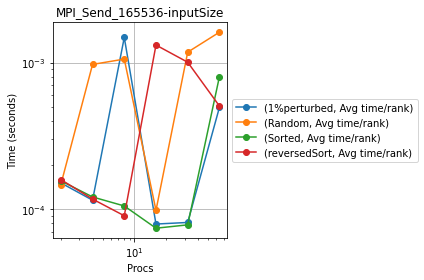

<Figure size 1440x1440 with 0 Axes>

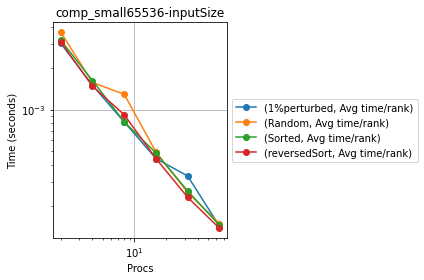

<Figure size 1440x1440 with 0 Axes>

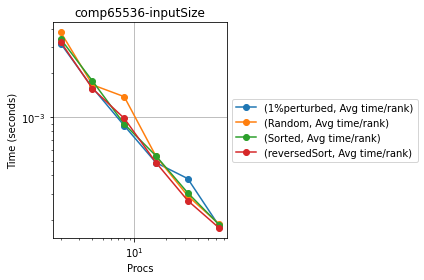

<Figure size 1440x1440 with 0 Axes>

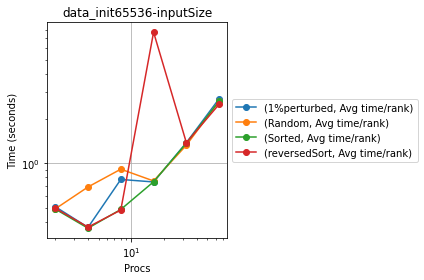

<Figure size 1440x1440 with 0 Axes>

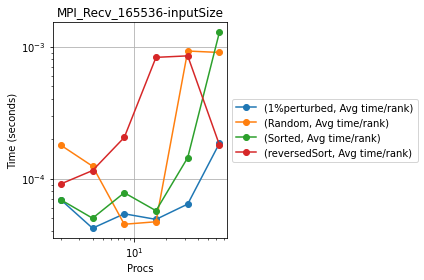

<Figure size 1440x1440 with 0 Axes>

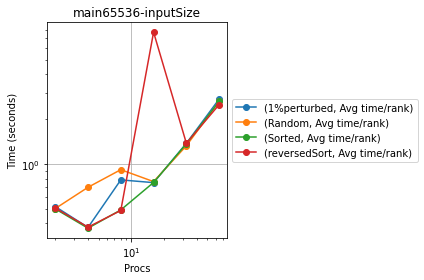

<Figure size 1440x1440 with 0 Axes>

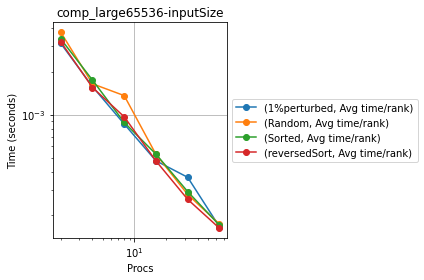

In [81]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name+"65536-inputSize",
        xlabel="Procs",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()